# Analisis Trending Video Youtube Indonesia

## Kelompok ANAK SD
- Hafiz Bhadrika Alamsyah (1906399650)
- Nofaldi Fikrul Atmam (1906398420)
- Dzikri Qalam Hatorangan (2006595854)

## Data Set
“Starter: Indonesia’s Trending YouTube 298d8341-4” <br/>
https://www.kaggle.com/code/kerneler/starter-indonesia-s-trending-youtube-298d8341-4/data

## Import Section

In [78]:
import pandas as pd
from isodate import parse_duration
import seaborn as sns
import matplotlib.pyplot as plt
from dateutil.parser import parse
import datetime as dt
from wordcloud import WordCloud
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score, r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

## Pre Defined Function

> Menghitung unique value pada kolom

In [3]:
def count_unique(cols):
    print("<-- Unique Value Counter -->")
    for x in cols:
        uq = data[x].unique()
        print(f"{x} - {len(uq)} value")

In [4]:
def parse_interval(pub, tren):
    return (parse(tren) - parse(pub)).total_seconds()

In [5]:
def evaluate_regression_performance(actual, prediction, classifier):
    print(f"r2 score: {r2_score(actual, prediction)}")
    print(f"MAE score: {mean_absolute_error(actual, prediction)}")
    print(f"MSE score: {mean_squared_error(actual, prediction)}")

## Data Cleaning

In [6]:
# Import data
data = pd.read_csv('trending.csv')
data.head()

/tmp/ipykernel_687/4111168274.py:2: DtypeWarning: Columns (0,5) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('trending.csv')


,video_id,publish_time,channel_id,title,description,thumbnail_url,thumbnail_width,thumbnail_height,channel_name,tags,...,caption,license_status,allowed_region,blocked_region,view,like,dislike,favorite,comment,trending_time
0,NaN,2021-02-05T09:00:34Z,UCEf_Bc-KVd7onSeifS3py9g,aespa 에스파 'Forever (약속)' MV,"aespa's new single ""Forever"" is out!\nListen a...",NaN,NaN,NaN,SMTOWN,NaN,...,True,True,NaN,NaN,7806846.0,857902.0,24078.0,0,94961.0,2021-02-07 05:46:51.832614+00:00
1,NaN,2021-02-04T15:54:08Z,UCYEa4_MC7OFjcWrO6SO-u8g,[FULL] Siapa di Balik Kudeta AHY? | Dua Sisi t...,"Jakarta, https://www.tvonenews.com - Ketua umu...",NaN,NaN,NaN,Indonesia Lawyers Club,"['tvone', 'tv one', 'tvonenews', 'indonesia la...",...,False,True,NaN,NaN,885038.0,6765.0,1263.0,0,6365.0,2021-02-07 05:46:51.832649+00:00
2,NaN,2021-02-06T03:00:22Z,UCu12RxQjRQyh79YBYvEDkOg,CABRIOLET CHALLENGE: TANTANGAN MENGGODA (7/12),Road Party Season 2: Cabriolet Challenge\n\nEp...,NaN,NaN,NaN,Motomobi,"['MotoMobi', 'Mobil', 'motor', 'review', 'indo...",...,False,True,NaN,NaN,889708.0,47895.0,532.0,0,8785.0,2021-02-07 05:46:51.832664+00:00
3,NaN,2021-02-05T20:26:08Z,UCCuzDCoI3EUOo_nhCj4noSw,With Windah Basudara & Hans,Join this channel to get access to perks:\nhtt...,NaN,NaN,NaN,yb,NaN,...,False,True,NaN,NaN,1006854.0,91973.0,3967.0,0,12957.0,2021-02-07 05:46:51.832678+00:00
4,NaN,2021-02-03T23:14:54Z,UC14UlmYlSNiQCBe9Eookf_A,🤯 LATE COMEBACK DRAMA! | HIGHLIGHTS | Granada ...,"With just two minutes to play, Barça looked to...",NaN,NaN,NaN,FC Barcelona,"['FC Barcelona', 'برشلونة،', 'Fútbol', 'FUTBOL...",...,False,True,NaN,NaN,6275035.0,218131.0,4289.0,0,12799.0,2021-02-07 05:46:51.832730+00:00


In [7]:
# Check total rows and columns
print(f"{data.shape[0]} row and {data.shape[1]} column")

87172 row and 27 column


In [8]:
# Data set information
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87172 entries, 0 to 87171
Data columns (total 27 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   video_id           34050 non-null  object 
 1   publish_time       87172 non-null  object 
 2   channel_id         87172 non-null  object 
 3   title              87172 non-null  object 
 4   description        83394 non-null  object 
 5   thumbnail_url      34050 non-null  object 
 6   thumbnail_width    34050 non-null  float64
 7   thumbnail_height   34050 non-null  float64
 8   channel_name       87172 non-null  object 
 9   tags               75046 non-null  object 
 10  category_id        87172 non-null  int64  
 11  live_status        87172 non-null  object 
 12  local_title        87172 non-null  object 
 13  local_description  83394 non-null  object 
 14  duration           87172 non-null  object 
 15  dimension          87172 non-null  object 
 16  definition         871

In [9]:
# Data set description
data.describe()

,thumbnail_width,thumbnail_height,category_id,view,like,dislike,favorite,comment
count,34050.0,34050.0,87172.000000,8.716200e+04,8.633100e+04,53630.000000,87172.0,8.678800e+04
mean,480.0,360.0,18.579326,3.762438e+06,1.755848e+05,4561.291535,0.0,1.427810e+04
std,0.0,0.0,6.985279,1.200179e+07,6.273486e+05,17034.843541,0.0,1.361006e+05
min,480.0,360.0,1.000000,1.528200e+04,1.600000e+01,0.000000,0.0,0.000000e+00
25%,480.0,360.0,10.000000,3.945315e+05,9.341500e+03,190.000000,0.0,5.907500e+02
50%,480.0,360.0,22.000000,1.023036e+06,2.889900e+04,578.000000,0.0,1.843000e+03
75%,480.0,360.0,24.000000,2.579029e+06,9.922000e+04,1999.000000,0.0,5.677000e+03
max,480.0,360.0,29.000000,3.359576e+08,1.700526e+07,433282.000000,0.0,7.195733e+06


In [10]:
# Show unique values of each columns
count_unique(data.columns)

<-- Unique Value Counter -->
video_id - 5234 value
publish_time - 15875 value
channel_id - 2575 value
title - 16297 value
description - 14370 value
thumbnail_url - 5234 value
thumbnail_width - 2 value
thumbnail_height - 2 value
channel_name - 2629 value
tags - 10233 value
category_id - 15 value
live_status - 1 value
local_title - 16297 value
local_description - 14370 value
duration - 3434 value
dimension - 1 value
definition - 2 value
caption - 2 value
license_status - 2 value
allowed_region - 75 value
blocked_region - 141 value
view - 85908 value
like - 60180 value
dislike - 10618 value
favorite - 1 value
comment - 20876 value
trending_time - 87172 value


> Beberapa kolom akan di remove karena unique valuenya yang sedikit jadi tidak relevan, kolom tersbut antara lain *thumbnail_width*, *thumbnail_height*, *live_status*, *dimension*, *allow_region*, *blocked_region*, *favorite*

In [11]:
data = data.drop(['thumbnail_width', 'thumbnail_height', 'live_status', 'dimension', 'allowed_region', 'blocked_region', 'favorite'], axis=1)
data.head()

,video_id,publish_time,channel_id,title,description,thumbnail_url,channel_name,tags,category_id,local_title,local_description,duration,definition,caption,license_status,view,like,dislike,comment,trending_time
0,NaN,2021-02-05T09:00:34Z,UCEf_Bc-KVd7onSeifS3py9g,aespa 에스파 'Forever (약속)' MV,"aespa's new single ""Forever"" is out!\nListen a...",NaN,SMTOWN,NaN,10,aespa 에스파 'Forever (약속)' MV,"aespa's new single ""Forever"" is out!\nListen a...",PT5M7S,hd,True,True,7806846.0,857902.0,24078.0,94961.0,2021-02-07 05:46:51.832614+00:00
1,NaN,2021-02-04T15:54:08Z,UCYEa4_MC7OFjcWrO6SO-u8g,[FULL] Siapa di Balik Kudeta AHY? | Dua Sisi t...,"Jakarta, https://www.tvonenews.com - Ketua umu...",NaN,Indonesia Lawyers Club,"['tvone', 'tv one', 'tvonenews', 'indonesia la...",25,[FULL] Siapa di Balik Kudeta AHY? | Dua Sisi t...,"Jakarta, https://www.tvonenews.com - Ketua umu...",PT42M30S,hd,False,True,885038.0,6765.0,1263.0,6365.0,2021-02-07 05:46:51.832649+00:00
2,NaN,2021-02-06T03:00:22Z,UCu12RxQjRQyh79YBYvEDkOg,CABRIOLET CHALLENGE: TANTANGAN MENGGODA (7/12),Road Party Season 2: Cabriolet Challenge\n\nEp...,NaN,Motomobi,"['MotoMobi', 'Mobil', 'motor', 'review', 'indo...",2,CABRIOLET CHALLENGE: TANTANGAN MENGGODA (7/12),Road Party Season 2: Cabriolet Challenge\n\nEp...,PT46M43S,hd,False,True,889708.0,47895.0,532.0,8785.0,2021-02-07 05:46:51.832664+00:00
3,NaN,2021-02-05T20:26:08Z,UCCuzDCoI3EUOo_nhCj4noSw,With Windah Basudara & Hans,Join this channel to get access to perks:\nhtt...,NaN,yb,NaN,20,With Windah Basudara & Hans,Join this channel to get access to perks:\nhtt...,PT45M59S,hd,False,True,1006854.0,91973.0,3967.0,12957.0,2021-02-07 05:46:51.832678+00:00
4,NaN,2021-02-03T23:14:54Z,UC14UlmYlSNiQCBe9Eookf_A,🤯 LATE COMEBACK DRAMA! | HIGHLIGHTS | Granada ...,"With just two minutes to play, Barça looked to...",NaN,FC Barcelona,"['FC Barcelona', 'برشلونة،', 'Fútbol', 'FUTBOL...",17,🤯 LATE COMEBACK DRAMA! | HIGHLIGHTS | Granada ...,"With just two minutes to play, Barça looked to...",PT5M12S,hd,False,True,6275035.0,218131.0,4289.0,12799.0,2021-02-07 05:46:51.832730+00:00


In [12]:
# Check for null value
data.isnull().sum()

video_id             53122
publish_time             0
channel_id               0
title                    0
description           3778
thumbnail_url        53122
channel_name             0
tags                 12126
category_id              0
local_title              0
local_description     3778
duration                 0
definition               0
caption                  0
license_status           0
view                    10
like                   841
dislike              33542
comment                384
trending_time            0
dtype: int64

> Beberap kolom akan di drop karena null value yang terlalu banyak dan menurut kami kurang relevan kegunaanya pada eksperimen kami, kolomnya antara lain *video_id*, *description*, *thumbnail_url*, *tags*, *local_title*, *local_description*, *channel_id*

In [13]:
data = data.drop(['video_id', 'description', 'thumbnail_url', 'tags', 'local_title', 'local_description', 'channel_id'], axis=1)
data.head()

,publish_time,title,channel_name,category_id,duration,definition,caption,license_status,view,like,dislike,comment,trending_time
0,2021-02-05T09:00:34Z,aespa 에스파 'Forever (약속)' MV,SMTOWN,10,PT5M7S,hd,True,True,7806846.0,857902.0,24078.0,94961.0,2021-02-07 05:46:51.832614+00:00
1,2021-02-04T15:54:08Z,[FULL] Siapa di Balik Kudeta AHY? | Dua Sisi t...,Indonesia Lawyers Club,25,PT42M30S,hd,False,True,885038.0,6765.0,1263.0,6365.0,2021-02-07 05:46:51.832649+00:00
2,2021-02-06T03:00:22Z,CABRIOLET CHALLENGE: TANTANGAN MENGGODA (7/12),Motomobi,2,PT46M43S,hd,False,True,889708.0,47895.0,532.0,8785.0,2021-02-07 05:46:51.832664+00:00
3,2021-02-05T20:26:08Z,With Windah Basudara & Hans,yb,20,PT45M59S,hd,False,True,1006854.0,91973.0,3967.0,12957.0,2021-02-07 05:46:51.832678+00:00
4,2021-02-03T23:14:54Z,🤯 LATE COMEBACK DRAMA! | HIGHLIGHTS | Granada ...,FC Barcelona,17,PT5M12S,hd,False,True,6275035.0,218131.0,4289.0,12799.0,2021-02-07 05:46:51.832730+00:00


In [14]:
# Check for null again
data.isnull().sum()

publish_time          0
title                 0
channel_name          0
category_id           0
duration              0
definition            0
caption               0
license_status        0
view                 10
like                841
dislike           33542
comment             384
trending_time         0
dtype: int64

> Untuk view, like, dislike dan comment kita akan mengisi null value menggunakan rata-rata dari kolom tersebut

In [15]:
# Count mean
view_mean = data['view'].mean()
like_mean = data['like'].mean()
dislike_mean = data['dislike'].mean()
comment_mean = data['comment'].mean()

# Fill null value
data['view'].fillna(value=view_mean, inplace=True)
data['like'].fillna(value=like_mean, inplace=True)
data['dislike'].fillna(value=dislike_mean, inplace=True)
data['comment'].fillna(value=comment_mean, inplace=True)

data.isnull().sum()

publish_time      0
title             0
channel_name      0
category_id       0
duration          0
definition        0
caption           0
license_status    0
view              0
like              0
dislike           0
comment           0
trending_time     0
dtype: int64

In [16]:
# Check definition unique value
data.definition.unique()

array(['hd', 'sd'], dtype=object)

> Untuk kolom definition, caption dan license_status yang tipenya binomial akan kita ubah menjadi numerikal 0 dan 1

In [17]:
# Replacing categorical to numerical
data['definition'].replace(['hd', 'sd'], [0, 1], inplace=True)
data['caption'] = data['caption'].astype(int)
data['license_status'] = data['license_status'].astype(int)

data.head()

,publish_time,title,channel_name,category_id,duration,definition,caption,license_status,view,like,dislike,comment,trending_time
0,2021-02-05T09:00:34Z,aespa 에스파 'Forever (약속)' MV,SMTOWN,10,PT5M7S,0,1,1,7806846.0,857902.0,24078.0,94961.0,2021-02-07 05:46:51.832614+00:00
1,2021-02-04T15:54:08Z,[FULL] Siapa di Balik Kudeta AHY? | Dua Sisi t...,Indonesia Lawyers Club,25,PT42M30S,0,0,1,885038.0,6765.0,1263.0,6365.0,2021-02-07 05:46:51.832649+00:00
2,2021-02-06T03:00:22Z,CABRIOLET CHALLENGE: TANTANGAN MENGGODA (7/12),Motomobi,2,PT46M43S,0,0,1,889708.0,47895.0,532.0,8785.0,2021-02-07 05:46:51.832664+00:00
3,2021-02-05T20:26:08Z,With Windah Basudara & Hans,yb,20,PT45M59S,0,0,1,1006854.0,91973.0,3967.0,12957.0,2021-02-07 05:46:51.832678+00:00
4,2021-02-03T23:14:54Z,🤯 LATE COMEBACK DRAMA! | HIGHLIGHTS | Granada ...,FC Barcelona,17,PT5M12S,0,0,1,6275035.0,218131.0,4289.0,12799.0,2021-02-07 05:46:51.832730+00:00


> Karena duration formatnya masih sesuai standar youtube akan kita ubah menjadi detik

In [18]:
# Check for duplicate
data.duplicated().sum()

0

> Dapat kita lihat tidak ada data yang duplikat

In [19]:
for i in range(len(data['duration'])):
    data['duration'][i] = parse_duration(data['duration'][i]).total_seconds()

data.head()

/tmp/ipykernel_687/647008316.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['duration'][i] = parse_duration(data['duration'][i]).total_seconds()


,publish_time,title,channel_name,category_id,duration,definition,caption,license_status,view,like,dislike,comment,trending_time
0,2021-02-05T09:00:34Z,aespa 에스파 'Forever (약속)' MV,SMTOWN,10,307.0,0,1,1,7806846.0,857902.0,24078.0,94961.0,2021-02-07 05:46:51.832614+00:00
1,2021-02-04T15:54:08Z,[FULL] Siapa di Balik Kudeta AHY? | Dua Sisi t...,Indonesia Lawyers Club,25,2550.0,0,0,1,885038.0,6765.0,1263.0,6365.0,2021-02-07 05:46:51.832649+00:00
2,2021-02-06T03:00:22Z,CABRIOLET CHALLENGE: TANTANGAN MENGGODA (7/12),Motomobi,2,2803.0,0,0,1,889708.0,47895.0,532.0,8785.0,2021-02-07 05:46:51.832664+00:00
3,2021-02-05T20:26:08Z,With Windah Basudara & Hans,yb,20,2759.0,0,0,1,1006854.0,91973.0,3967.0,12957.0,2021-02-07 05:46:51.832678+00:00
4,2021-02-03T23:14:54Z,🤯 LATE COMEBACK DRAMA! | HIGHLIGHTS | Granada ...,FC Barcelona,17,312.0,0,0,1,6275035.0,218131.0,4289.0,12799.0,2021-02-07 05:46:51.832730+00:00


## Exploratory Data Analysis

### Kategori video trending mana yang memiliki rata-rata view paling banyak

In [20]:
# Group view based on category
group_cat = data[['category_id', 'view']].copy()
group_cat.groupby(['category_id']).mean()

,view
category_id,
1,3.313833e+06
2,6.934077e+05
10,5.135872e+06
15,3.921424e+06
17,4.213921e+06
19,9.418807e+05
20,1.712258e+06
22,3.171201e+06
23,8.442261e+06


> Data sudah kitakelompokan sesuai dengan kategorinya, sekaran akan kita tampilkan sebagai boxplot

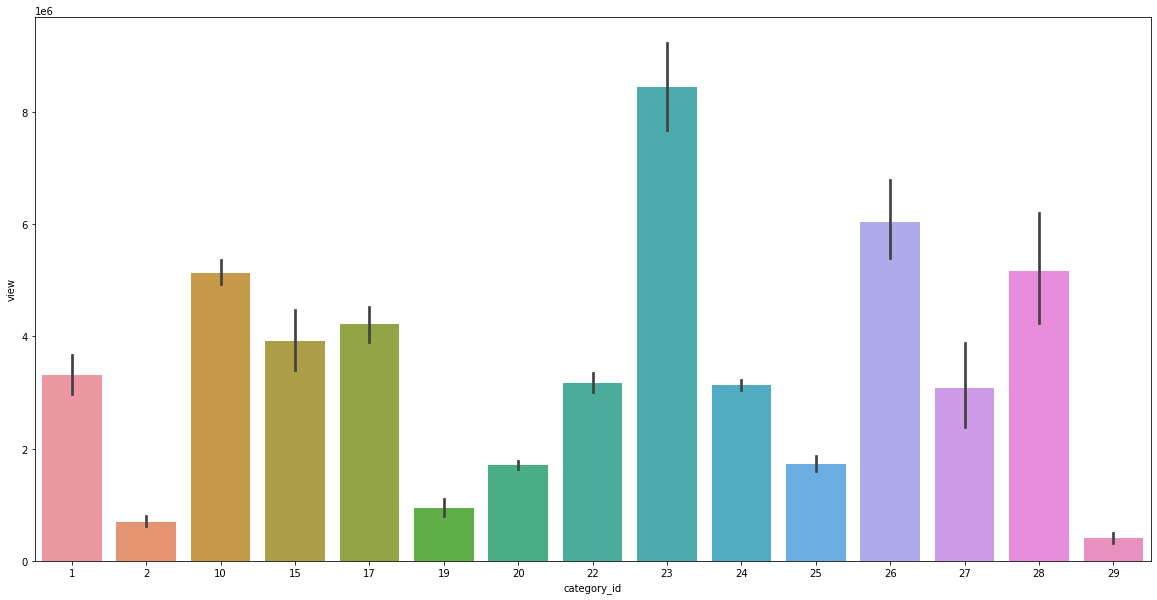

In [21]:
plt.figure(figsize=(20,10))
sns.barplot(x='category_id', y='view',data=group_cat, dodge=False)
plt.show()

> Berdasarkan tampilan dari barplot di atas dapat kita lihat bahwa kategori yang memiliki rata-rata view paling banyak adalah kategori dengan id 23.

> Berdasarkan sumber dari youtube API https://gist.github.com/dgp/1b24bf2961521bd75d6c kategori dengan id 23 adalah kategori komedi

### Channel youtube mana yang memiliki video trending paling banyak berdasarkan kategori video

In [22]:
# Group by channel name and category
chanel_group = data[['channel_name', 'category_id']].copy()
channnel_group_mode = chanel_group.groupby(['category_id'], as_index=False).agg(pd.Series.mode)
channnel_group_mode['count'] = 0

for i in range(len(channnel_group_mode['channel_name'])):
    channnel_group_mode['count'][i] = chanel_group[chanel_group['channel_name'] == channnel_group_mode['channel_name'][i]].count().values[0]

channnel_group_mode = channnel_group_mode.sort_values(by=['count'], ascending=False)
channnel_group_mode


/tmp/ipykernel_687/2978871402.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  channnel_group_mode['count'][i] = chanel_group[chanel_group['channel_name'] == channnel_group_mode['channel_name'][i]].count().values[0]


,category_id,channel_name,count
9,24,Deddy Corbuzier,756
2,10,SMTOWN,509
8,23,WARINTIL OFFICIAL,453
7,22,Nihongo Mantappu,398
14,29,Philip Mantofa,385
10,25,KOMPASTV,366
0,1,Muse Indonesia,328
13,28,GadgetIn,325
4,17,Manchester United,317
6,20,PUBG MOBILE Indonesia,312


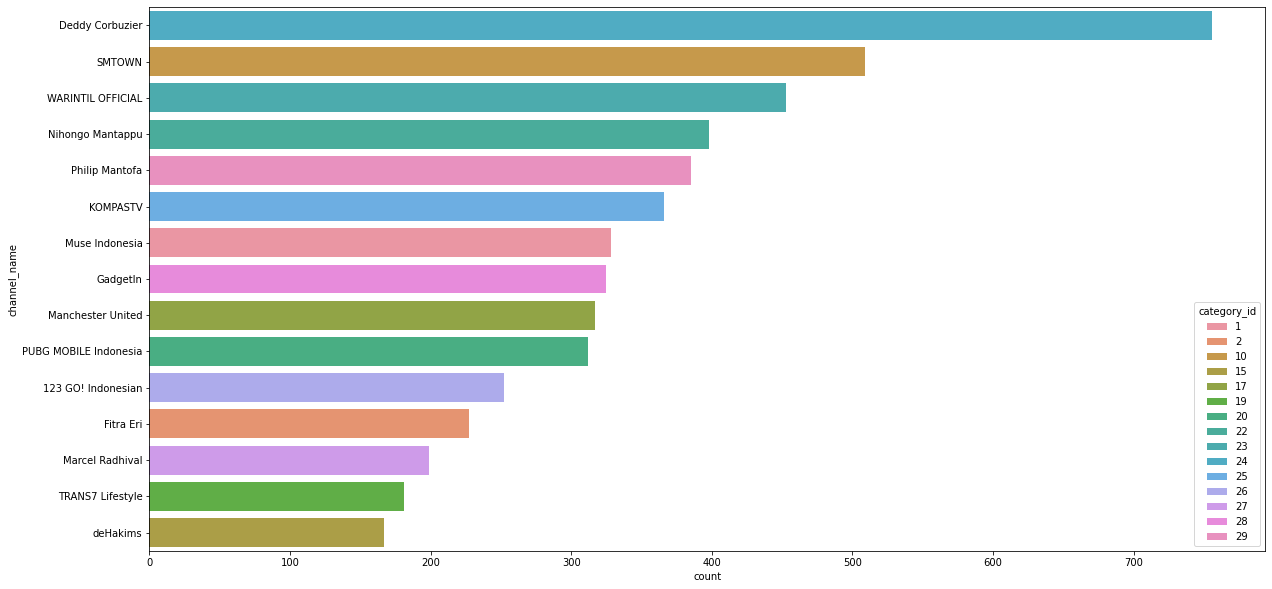

In [23]:
# Plotting
plt.figure(figsize=(20,10))
sns.barplot(x='count', y='channel_name', hue='category_id', orient='h', data=channnel_group_mode, dodge=False)
plt.show()

> Informasi terkait id kategori dapat dilihat dibawah sini

- 2 - Autos & Vehicles
- 1 -  Film & Animation
- 10 - Music
- 15 - Pets & Animals
- 17 - Sports
- 18 - Short Movies
- 19 - Travel & Events
- 20 - Gaming
- 21 - Videoblogging
- 22 - People & Blogs
- 23 - Comedy
- 24 - Entertainment
- 25 - News & Politics
- 26 - Howto & Style
- 27 - Education
- 28 - Science & Technology
- 29 - Nonprofits & Activism
- 30 - Movies
- 31 - Anime/Animation
- 32 - Action/Adventure
- 33 - Classics
- 34 - Comedy
- 35 - Documentary
- 36 - Drama
- 37 - Family
- 38 - Foreign
- 39 - Horror
- 40 - Sci-Fi/Fantasy
- 41 - Thriller
- 42 - Shorts
- 43 - Shows
- 44 - Trailers

### Perbandingan rata-rata like, dislike dan comment berdasarkan suatu kategori video

In [24]:
# Grouping by likem dislike and comment based on category id
ldc_group = data[['like', 'dislike', 'comment', 'category_id']].copy()
ldc_group.groupby(['category_id'], as_index=False).mean()

,category_id,like,dislike,comment
0,1,144702.903799,3287.402701,5369.469223
1,2,17736.597776,2216.430289,1823.848921
2,10,314872.198977,5180.168312,40125.187478
3,15,156862.099057,3831.761464,3334.836478
4,17,122936.830079,3335.378946,3045.211229
5,19,49553.136171,2158.367534,1286.529274
6,20,74138.095926,3978.995316,4833.305826
7,22,150991.036079,5107.267865,5647.165635
8,23,299289.290488,10471.875796,3473.338435
9,24,146611.079030,4166.151875,8464.595333


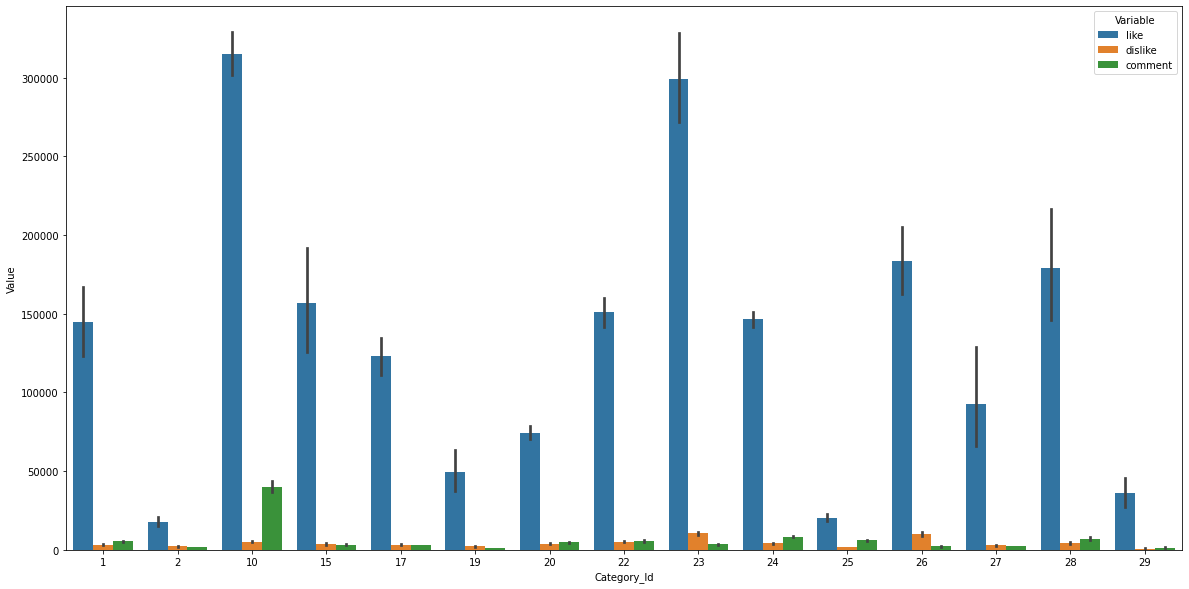

In [25]:
# Plotting
plt.figure(figsize=(20,10))
tidy = ldc_group.melt(id_vars='category_id').rename(columns=str.title)
sns.barplot(x='Category_Id', y='Value', hue='Variable',data=tidy)
plt.show()

### Rata rata waktu yang dibutuhkan oleh suatu video dari pertama kali di publish hingga trending

In [26]:
# Copy specific column
pub_tren_group = data[['publish_time', 'trending_time']].copy()
pub_tren_group['interval'] = 0
pub_tren_group.head()

,publish_time,trending_time,interval
0,2021-02-05T09:00:34Z,2021-02-07 05:46:51.832614+00:00,0
1,2021-02-04T15:54:08Z,2021-02-07 05:46:51.832649+00:00,0
2,2021-02-06T03:00:22Z,2021-02-07 05:46:51.832664+00:00,0
3,2021-02-05T20:26:08Z,2021-02-07 05:46:51.832678+00:00,0
4,2021-02-03T23:14:54Z,2021-02-07 05:46:51.832730+00:00,0


In [27]:
# Finding interval
for i in range(len(pub_tren_group['publish_time'])):
    pub_tren_group['interval'][i] = parse_interval(pub_tren_group['publish_time'][i], pub_tren_group['trending_time'][i])
pub_tren_group

/tmp/ipykernel_687/353040977.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pub_tren_group['interval'][i] = parse_interval(pub_tren_group['publish_time'][i], pub_tren_group['trending_time'][i])


,publish_time,trending_time,interval
0,2021-02-05T09:00:34Z,2021-02-07 05:46:51.832614+00:00,1.611778e+05
1,2021-02-04T15:54:08Z,2021-02-07 05:46:51.832649+00:00,2.227638e+05
2,2021-02-06T03:00:22Z,2021-02-07 05:46:51.832664+00:00,9.638983e+04
3,2021-02-05T20:26:08Z,2021-02-07 05:46:51.832678+00:00,1.200438e+05
4,2021-02-03T23:14:54Z,2021-02-07 05:46:51.832730+00:00,2.827178e+05
...,...,...,...
87167,2022-05-24T09:00:20Z,2022-06-09 06:01:40.747651+00:00,1.371681e+06
87168,2022-05-12T12:30:00Z,2022-06-09 06:01:40.747669+00:00,2.395901e+06
87169,2022-05-06T11:30:09Z,2022-06-09 06:01:40.747687+00:00,2.917892e+06
87170,2022-05-11T04:01:25Z,2022-06-09 06:01:40.747705+00:00,2.512816e+06


In [28]:
# Finding interval in seconds

intv_max = pub_tren_group['interval'].max()
intv_mean = pub_tren_group['interval'].mean()
intv_min = pub_tren_group['interval'].min()

print(f"maximal waktu yang dibutuhkan untuk trending adalah: {dt.timedelta(seconds=intv_max)}")
print(f"minimal waktu yang dibutuhkan untuk trending adalah: {dt.timedelta(seconds=intv_min)}")
print(f"rata-rata waktu yang dibutuhkan untuk trending adalah: {dt.timedelta(seconds=intv_mean)}")

maximal waktu yang dibutuhkan untuk trending adalah: 36 days, 22:02:50.670494
minimal waktu yang dibutuhkan untuk trending adalah: 4:27:02.851424
rata-rata waktu yang dibutuhkan untuk trending adalah: 6 days, 22:01:28.855256


### Kata yang sering digunakan pada title video trending

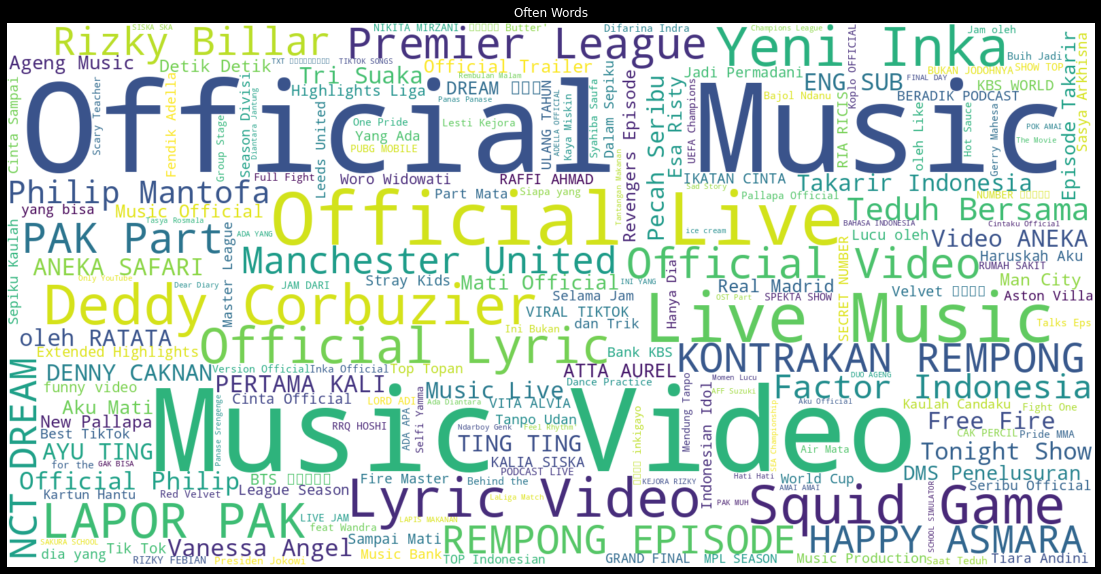

In [29]:
text = ""
for i in range(data.shape[0]):
    text += data.iloc[i]['title']

wordcloud = WordCloud(background_color='white',width=1600,height=800,stopwords='indonesian',min_word_length=3,collocations=True).generate(text)
plt.figure(figsize=(20,10),facecolor='k')
plt.axis("off")
plt.title('Often Words',color='white')
plt.imshow(wordcloud,interpolation='bilinear')
plt.show()

## Clustering

> Pertama kita akan melakukan clustering menggunakan Centroid base clustering untuk mengorganisi data ke struktur non-hierarki, disini kita akan menggunakan K-Means clustering

In [30]:
# Ambil feature yang sudah disesaikan
k_clust_data = data[['like', 'dislike', 'view', 'comment', 'caption']].copy()
k_clust_data.head()

,like,dislike,view,comment,caption
0,857902.0,24078.0,7806846.0,94961.0,1
1,6765.0,1263.0,885038.0,6365.0,0
2,47895.0,532.0,889708.0,8785.0,0
3,91973.0,3967.0,1006854.0,12957.0,0
4,218131.0,4289.0,6275035.0,12799.0,0


> karena range data terlalu jauh pada kolom like, view dan comment maka akan dilakukan standard scaling

In [31]:
scaler = StandardScaler()
k_clust_data_std = scaler.fit_transform(k_clust_data)

> Gunakan PCA untuk mereduce dimensi data

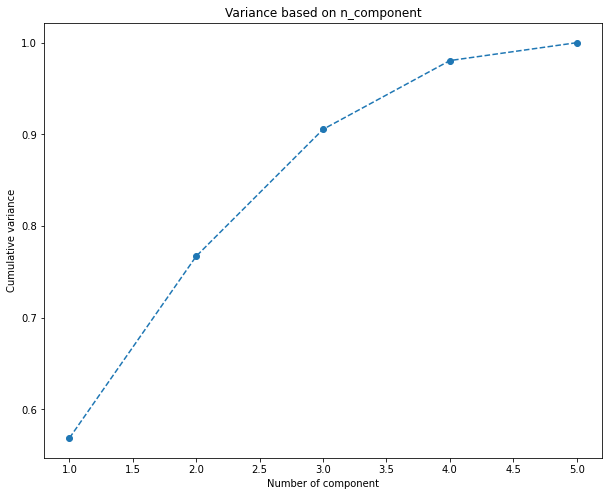

In [32]:
# Implement PCA dan coba cari n_component yang paling cocok
pca = PCA()
pca.fit(k_clust_data_std)

plt.figure(figsize=(10,8))
plt.plot(range(1,6), pca.explained_variance_ratio_.cumsum(), marker='o', linestyle="--")
plt.title('Variance based on n_component')
plt.xlabel('Number of component')
plt.ylabel('Cumulative variance')
plt.show()

> berdasarkan plot di atas, sesuai aturan standar pca kita sebaiknya mengambil nilai variance sekitar 80% maka disini kita akan memilih 2 komponen

In [33]:
# Rerun PCA based on graph
pca = PCA(n_components=2)
pca.fit(k_clust_data_std)
score_pca = pca.transform(k_clust_data_std)
score_pca

array([[ 2.00793104, -2.1003818 ],
       [-0.46161737,  0.28298612],
       [-0.44002933,  0.26728572],
       ...,
       [-0.09568146,  0.36895567],
       [ 0.01712574, -2.4931909 ],
       [ 0.30124767,  0.41185549]])

> Sekarang untuk mencari nilai K yang cocok pada kmeans

In [34]:
# Calculate inertia for each K
wcss = []
for i in range(1, 21):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(score_pca)
    wcss.append(kmeans.inertia_)

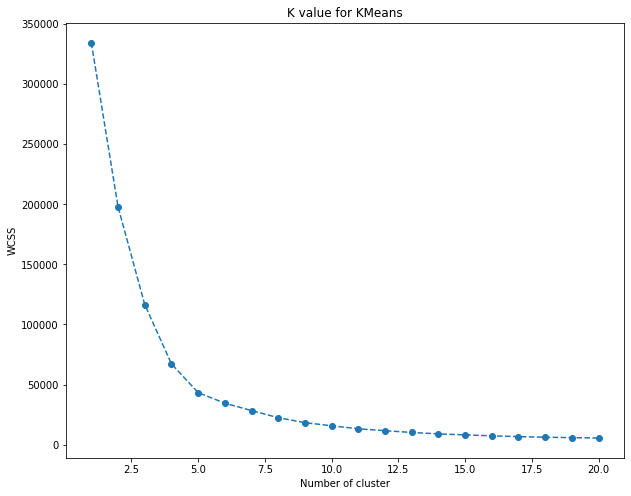

In [35]:
# Plot the wcss
plt.figure(figsize=(10,8))
plt.plot(range(1,21), wcss, marker='o', linestyle='--')
plt.title('K value for KMeans')
plt.xlabel('Number of cluster')
plt.ylabel('WCSS')
plt.show()

> Dari plot di atas kita lihat elbow mulai terjadi saat n=4, maka dari itu kita akan membuat 4 segmen clustering

In [36]:
# Kmeans with 4 segment
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(score_pca)

k_clust_pca = pd.DataFrame(score_pca)
k_clust_pca['labels'] = kmeans.labels_
k_clust_pca.head()

,0,1,labels
0,2.007931,-2.100382,2
1,-0.461617,0.282986,0
2,-0.440029,0.267286,0
3,-0.273216,0.335317,0
4,0.089427,0.381408,0


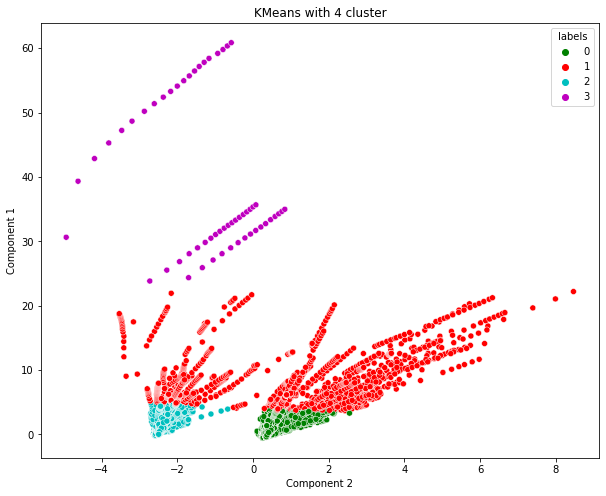

In [37]:
# Plot KMeans
plt.figure(figsize=(10,8))
sns.scatterplot(x=k_clust_pca[1], y=k_clust_pca[0], hue=k_clust_pca['labels'], palette=['g', 'r', 'c', 'm'])
plt.title('KMeans with 4 cluster')
plt.xlabel('Component 2')
plt.ylabel('Component 1')
plt.show()

> Coba clustering menggunakan Gaussian Mixture Model, kita akan menggunakan data yang sama setelah dilakukan standard scaling pada proses sebelumnya

In [38]:
# Create PCA
pca = PCA(n_components=2)
pca.fit(k_clust_data_std)
score_pca = pca.transform(k_clust_data_std)
score_pca = pd.DataFrame(score_pca)

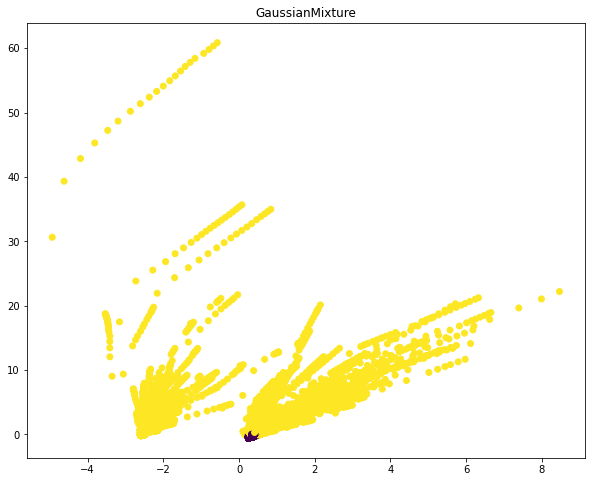

In [39]:
# GMNN n component 2
gmm2 = GaussianMixture(n_components=2).fit(score_pca)
labels = gmm2.predict(score_pca)

plt.figure(figsize=(10,8))
plt.title('GaussianMixture')
plt.scatter(x=score_pca[1], y=score_pca[0], c=labels, cmap='viridis')
plt.show()

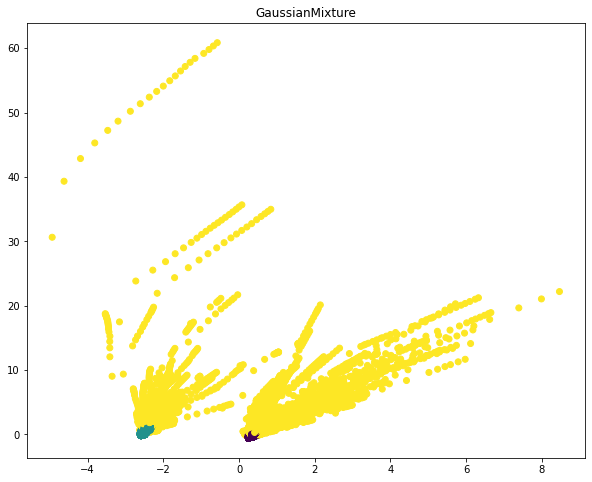

In [40]:
# GMNN n component 3
gmm3 = GaussianMixture(n_components=3).fit(score_pca)
labels = gmm3.predict(score_pca)

plt.figure(figsize=(10,8))
plt.title('GaussianMixture')
plt.scatter(x=score_pca[1], y=score_pca[0], c=labels, cmap='viridis')
plt.show()

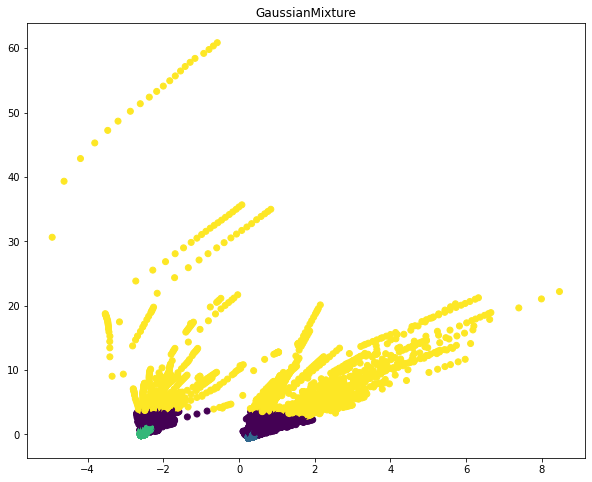

In [41]:
# GMNN n component 4
gmm4 = GaussianMixture(n_components=4).fit(score_pca)
labels = gmm4.predict(score_pca)

plt.figure(figsize=(10,8))
plt.title('GaussianMixture')
plt.scatter(x=score_pca[1], y=score_pca[0], c=labels, cmap='viridis')
plt.show()

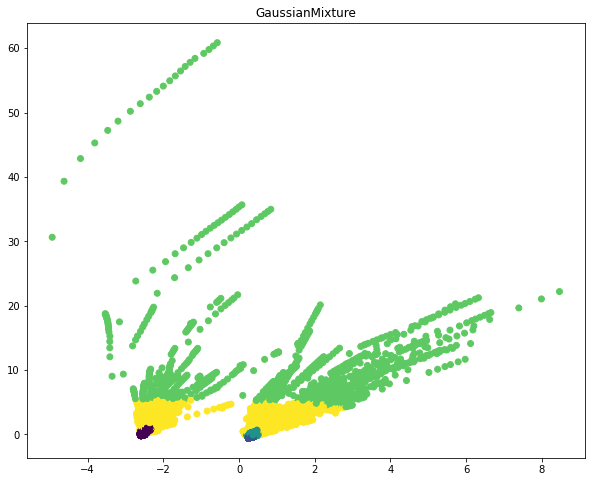

In [42]:
# GMNN n component 5
gmm5 = GaussianMixture(n_components=5).fit(score_pca)
labels = gmm5.predict(score_pca)

plt.figure(figsize=(10,8))
plt.title('GaussianMixture')
plt.scatter(x=score_pca[1], y=score_pca[0], c=labels, cmap='viridis')
plt.show()

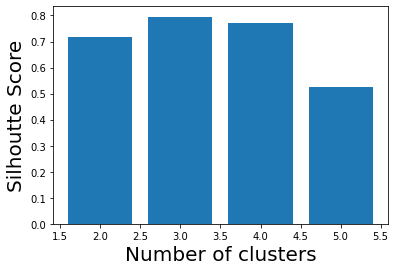

In [43]:
# Count silhoutte score
k = [2, 3, 4, 5]
  
# Appending the silhouette scores of the different models to the list
silhouette_scores = []
silhouette_scores.append(
        silhouette_score(score_pca, gmm2.fit_predict(score_pca)))
silhouette_scores.append(
        silhouette_score(score_pca, gmm3.fit_predict(score_pca)))
silhouette_scores.append(
        silhouette_score(score_pca, gmm4.fit_predict(score_pca)))
silhouette_scores.append(
        silhouette_score(score_pca, gmm5.fit_predict(score_pca)))
  
# Plotting a bar graph to compare the results
plt.bar(k, silhouette_scores)
plt.xlabel('Number of clusters', fontsize = 20)
plt.ylabel('Silhoutte Score', fontsize = 20)
plt.show()

> Berdasarkan hasil silhoute score nilai n_component yang paling cocok untuk GMM adalah 3

## Klasifikasi

Sayangnya pada Youtube data sekarang tidak menampilkan jumlah dislike :(

Membaca File video yang non trending

In [165]:
nontrend = pd.read_csv('nontrending.csv')
nontrend.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33 entries, 0 to 32
Data columns (total 15 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   items/id                              33 non-null     object 
 1   items/snippet/publishedAt             33 non-null     object 
 2   items/snippet/channelId               33 non-null     object 
 3   items/snippet/title                   33 non-null     object 
 4   items/snippet/categoryId              33 non-null     int64  
 5   items/contentDetails/duration         33 non-null     object 
 6   items/contentDetails/dimension        33 non-null     object 
 7   items/contentDetails/definition       33 non-null     object 
 8   items/contentDetails/caption          33 non-null     bool   
 9   items/contentDetails/licensedContent  33 non-null     bool   
 10  items/contentDetails/projection       33 non-null     object 
 11  items/statistics/view

Melihat 5 baris pertama dari file

In [166]:
nontrend.head()

,items/id,items/snippet/publishedAt,items/snippet/channelId,items/snippet/title,items/snippet/categoryId,items/contentDetails/duration,items/contentDetails/dimension,items/contentDetails/definition,items/contentDetails/caption,items/contentDetails/licensedContent,items/contentDetails/projection,items/statistics/viewCount,items/statistics/likeCount,items/statistics/favoriteCount,items/statistics/commentCount
0,oNOQxVYGAVE,2014-03-11T14:09:27Z,UCLONVqEzfCODDGF7kxKDS7Q,What's new in iOS 7.1,28,PT6M23S,2d,hd,False,True,rectangular,8278,28.0,0,1.0
1,tAgAfr_0KwY,2011-09-23T11:47:54Z,UC2Ix0vISKAMZncrEp_PhR_A,"Coopee KT200 VS Apple peel 520,Creative Acc...",28,PT5M8S,2d,hd,False,False,rectangular,1904,5.0,0,5.0
2,57Qj-uq0OcI,2014-09-13T22:50:18Z,UCmsG4hkX6bJh2LMfurSLIqA,The New iRec: iPod 5 Black Screen Fix!,22,PT2M31S,2d,hd,False,False,rectangular,5176,63.0,0,27.0
3,Nzr8XvGm2WU,2013-12-25T20:16:12Z,UCzbjcR2CuKrLhWuWgM_RVFA,SUPCASE New Apple iPad Air (iPad 5 5th Generat...,28,PT2M27S,2d,hd,False,True,rectangular,2086,7.0,0,1.0
4,hbayZNR6j7I,2012-10-24T20:48:07Z,UCXPtbqfneyLQRUJfmMcfJng,iPod Touch 5G - 5 - Recenzja - Test (PL) - Apple,28,PT5M42S,2d,hd,False,False,rectangular,123409,1048.0,0,213.0


Membuang kolum yang tidak dipakai untuk Klasifikasi

In [167]:
nontrend = nontrend.drop(['items/snippet/publishedAt', 'items/contentDetails/duration', 'items/contentDetails/definition', 'items/contentDetails/caption', 'items/contentDetails/licensedContent', 'items/snippet/channelId', 'items/snippet/title', 'items/statistics/favoriteCount', 'items/contentDetails/projection', 'items/contentDetails/dimension', 'items/id'], axis=1)
nontrend.head()

,items/snippet/categoryId,items/statistics/viewCount,items/statistics/likeCount,items/statistics/commentCount
0,28,8278,28.0,1.0
1,28,1904,5.0,5.0
2,22,5176,63.0,27.0
3,28,2086,7.0,1.0
4,28,123409,1048.0,213.0


Memberikan penamaan yang sesuai dengan nama kolumn trending supaya bisa di combine

In [169]:
nontrend.columns = ['category_id', 'view', 'like', 'comment', ]
nontrend.head()

,category_id,view,like,comment
0,28,8278,28.0,1.0
1,28,1904,5.0,5.0
2,22,5176,63.0,27.0
3,28,2086,7.0,1.0
4,28,123409,1048.0,213.0


Mengecek null values

In [170]:
# Check for null again
nontrend.isnull().sum()

category_id    0
view           0
like           2
comment        4
dtype: int64

Mengisi null values dengan nilai rata-rata

In [171]:
# Count mean
like_mean = data['like'].mean()
comment_mean = data['comment'].mean()

# Fill null value
nontrend['like'].fillna(value=like_mean, inplace=True)
nontrend['comment'].fillna(value=comment_mean, inplace=True)

Memberikan label klasifikasi dengan catatan NonTrending = 0 dan Trending = 1

In [172]:
nontrend['isTrending'] = 0
nontrend.head()

,category_id,view,like,comment,isTrending
0,28,8278,28.0,1.0,0
1,28,1904,5.0,5.0,0
2,22,5176,63.0,27.0,0
3,28,2086,7.0,1.0,0
4,28,123409,1048.0,213.0,0


Mengambil trending data sesuai kolum yang dibutuhkan dan memberikan label trending

In [173]:
trending_data = data[['category_id', 'view', 'like', 'comment']].copy()
trending_data['isTrending'] = 1
trending_data.head()

,category_id,view,like,comment,isTrending
0,10,7806846.0,857902.0,94961.0,1
1,25,885038.0,6765.0,6365.0,1
2,2,889708.0,47895.0,8785.0,1
3,20,1006854.0,91973.0,12957.0,1
4,17,6275035.0,218131.0,12799.0,1


Menggabung trending data dengan data non trending

In [175]:
combine_data = pd.concat([nontrend, trending_data])
combine_data.head()

,category_id,view,like,comment,isTrending
0,28,8278.0,28.0,1.0,0
1,28,1904.0,5.0,5.0,0
2,22,5176.0,63.0,27.0,0
3,28,2086.0,7.0,1.0,0
4,28,123409.0,1048.0,213.0,0


Menyiapkan klasifikasi dengan memisah label, data training, dan data test.

In [177]:
label = combine_data['isTrending'].to_frame() # Label pada data (Untuk diprediksi pada saat klasifikasi)
combine_data = combine_data.drop(['isTrending'], axis=1)

In [178]:
# Membagi dataset menjadi training set dan test set
# dengan jumlah training set adalah sebanyak 80% dari data keseluruhan 
data_train, data_test, label_train, label_test = train_test_split(combine_data, label, train_size=0.8, random_state=42)

In [179]:
# Melakukan training pada model decision tree
dt_md5 = DecisionTreeClassifier(max_depth=5)
dt_md5.fit(data_train, label_train)

DecisionTreeClassifier(max_depth=5)

In [180]:
# Memprediksi data testing
predicted = dt_md5.predict(data_test)

# Menampilkan metrics evaluasi berupa nilai akurasi, presisi, recall, dan F1-Score
print("Akurasi:", accuracy_score(label_test, predicted))
print("Presisi:", precision_score(label_test, predicted))
print("Recall:", recall_score(label_test, predicted))
print("F1-score:", f1_score(label_test, predicted))

Akurasi: 0.9999426638380827
Presisi: 0.9999426638380827
Recall: 1.0
F1-score: 0.999971331097159


### Using Random Forest

In [181]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Melakukan training pada model random forest
rf_md3 = RandomForestClassifier(max_depth=3)
rf_md3.fit(data_train, label_train)

# Memprediksi data testing
predicted = rf_md3.predict(data_test)

# Menampilkan metrics evaluasi berupa nilai akurasi, presisi, recall, dan F1-Score
print("Akurasi:", accuracy_score(label_test, predicted))
print("Presisi:", precision_score(label_test, predicted))
print("Recall:", recall_score(label_test, predicted))
print("F1-score:", f1_score(label_test, predicted))

/tmp/ipykernel_687/1700321972.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_md3.fit(data_train, label_train)


Akurasi: 0.9999426638380827
Presisi: 0.9999426638380827
Recall: 1.0
F1-score: 0.999971331097159


## Regresi

In [45]:
# Scale the data first
data_reg = data[['view', 'comment', 'category_id']].copy()
target = data[['like', 'dislike']].copy()
scaler = MinMaxScaler()
scaled_data_reg = pd.DataFrame(scaler.fit_transform(data_reg), columns=data_reg.columns)
scaled_data_reg

,view,comment,category_id
0,0.023193,0.013197,0.321429
1,0.002589,0.000885,0.857143
2,0.002603,0.001221,0.035714
3,0.002952,0.001801,0.678571
4,0.018633,0.001779,0.571429
...,...,...,...
87167,0.000442,0.000034,0.750000
87168,0.002271,0.000207,0.642857
87169,0.010644,0.001350,0.678571
87170,0.002034,0.000277,0.321429


In [46]:
# Splitting data for training and testing
X_train, X_test, y_train, y_test = train_test_split(scaled_data_reg, target, test_size = 0.3, random_state=2021)

> Regresi menggunakan Linear Regression

In [47]:
# Building model Linear Regression
regression = LinearRegression()
regression.fit(scaled_data_reg, target)
prediction = regression.predict(X_test)
evaluate_regression_performance(y_test, prediction, regression)

r2 score: 0.6224661983196892
MAE score: 48067.22833303437
MSE score: 34283820884.82891


> Regresi menggunakan Decision Tree Regressor

In [48]:
# Building model Decision Tree Regressor
dtreg = DecisionTreeRegressor()
dtreg.fit(scaled_data_reg, target)
prediction = dtreg.predict(X_test)
evaluate_regression_performance(y_test, prediction, dtreg)

r2 score: 0.9999980488921812
MAE score: 0.675332346841146
MSE score: 4197.332460429385


> Regresi menggunakan K-Nearest Neighbour

In [49]:
# Building model K-Neares Neighbour
knear = KNeighborsRegressor()
knear.fit(scaled_data_reg, target)
prediction = knear.predict(X_test)
evaluate_regression_performance(y_test, prediction, knear)

r2 score: 0.834713023939898
MAE score: 24670.67888327504
MSE score: 12616467368.733677


> Regresi menggunakan Lassor Regression

In [50]:
# Building model Lasso Regression
lasso = Lasso()
lasso.fit(scaled_data_reg, target)
prediction = lasso.predict(X_test)
evaluate_regression_performance(y_test, prediction, lasso)

r2 score: 0.6224243094176387
MAE score: 48067.82166347017
MSE score: 34283030148.525143


Dari hasil regresi menggunakan beberapa algoritma dapat kita lihat yang memiliki nilai r2-score paling besar adalah Decision Tree Regressor maka disini yang paling cocok adalah algoritma itu